In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import np_utils
from keras import regularizers
from keras.regularizers import l2
from keras import backend as K
from keras.models import load_model
from keras.utils import to_categorical
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from numpy import dstack
from os import makedirs
import itertools
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [6]:
df=pd.read_csv('/content/indian_liver_patient.csv')


In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df['Albumin_and_Globulin_Ratio'].mean()
df=df.replace(to_replace = np.nan, value = 0.95)

Number of patients diagnosed with liver disease (denoted by "1"):  416
Number of patients not diagnosed with liver disease (denoted by "2"):  167


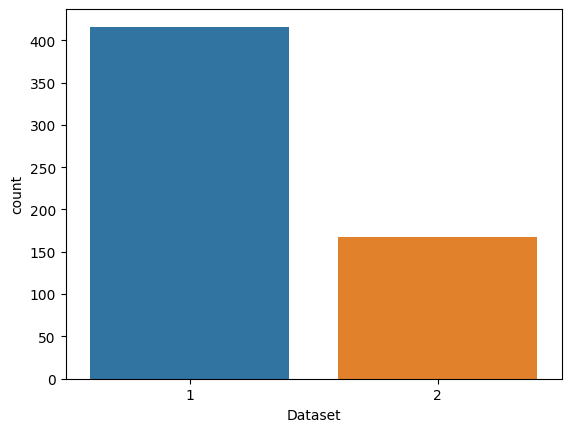

In [10]:
sns.countplot(data=df, x = 'Dataset', label='Count')

Yes,No = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease (denoted by "1"): ',Yes)
print('Number of patients not diagnosed with liver disease (denoted by "2"): ',No)

Number of patients that are male:  441
Number of patients that are female:  142


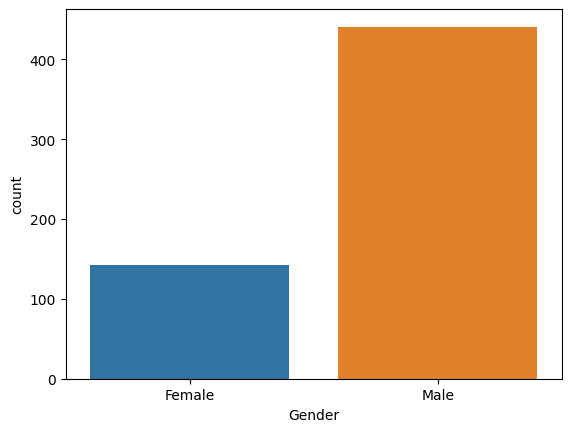

In [11]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

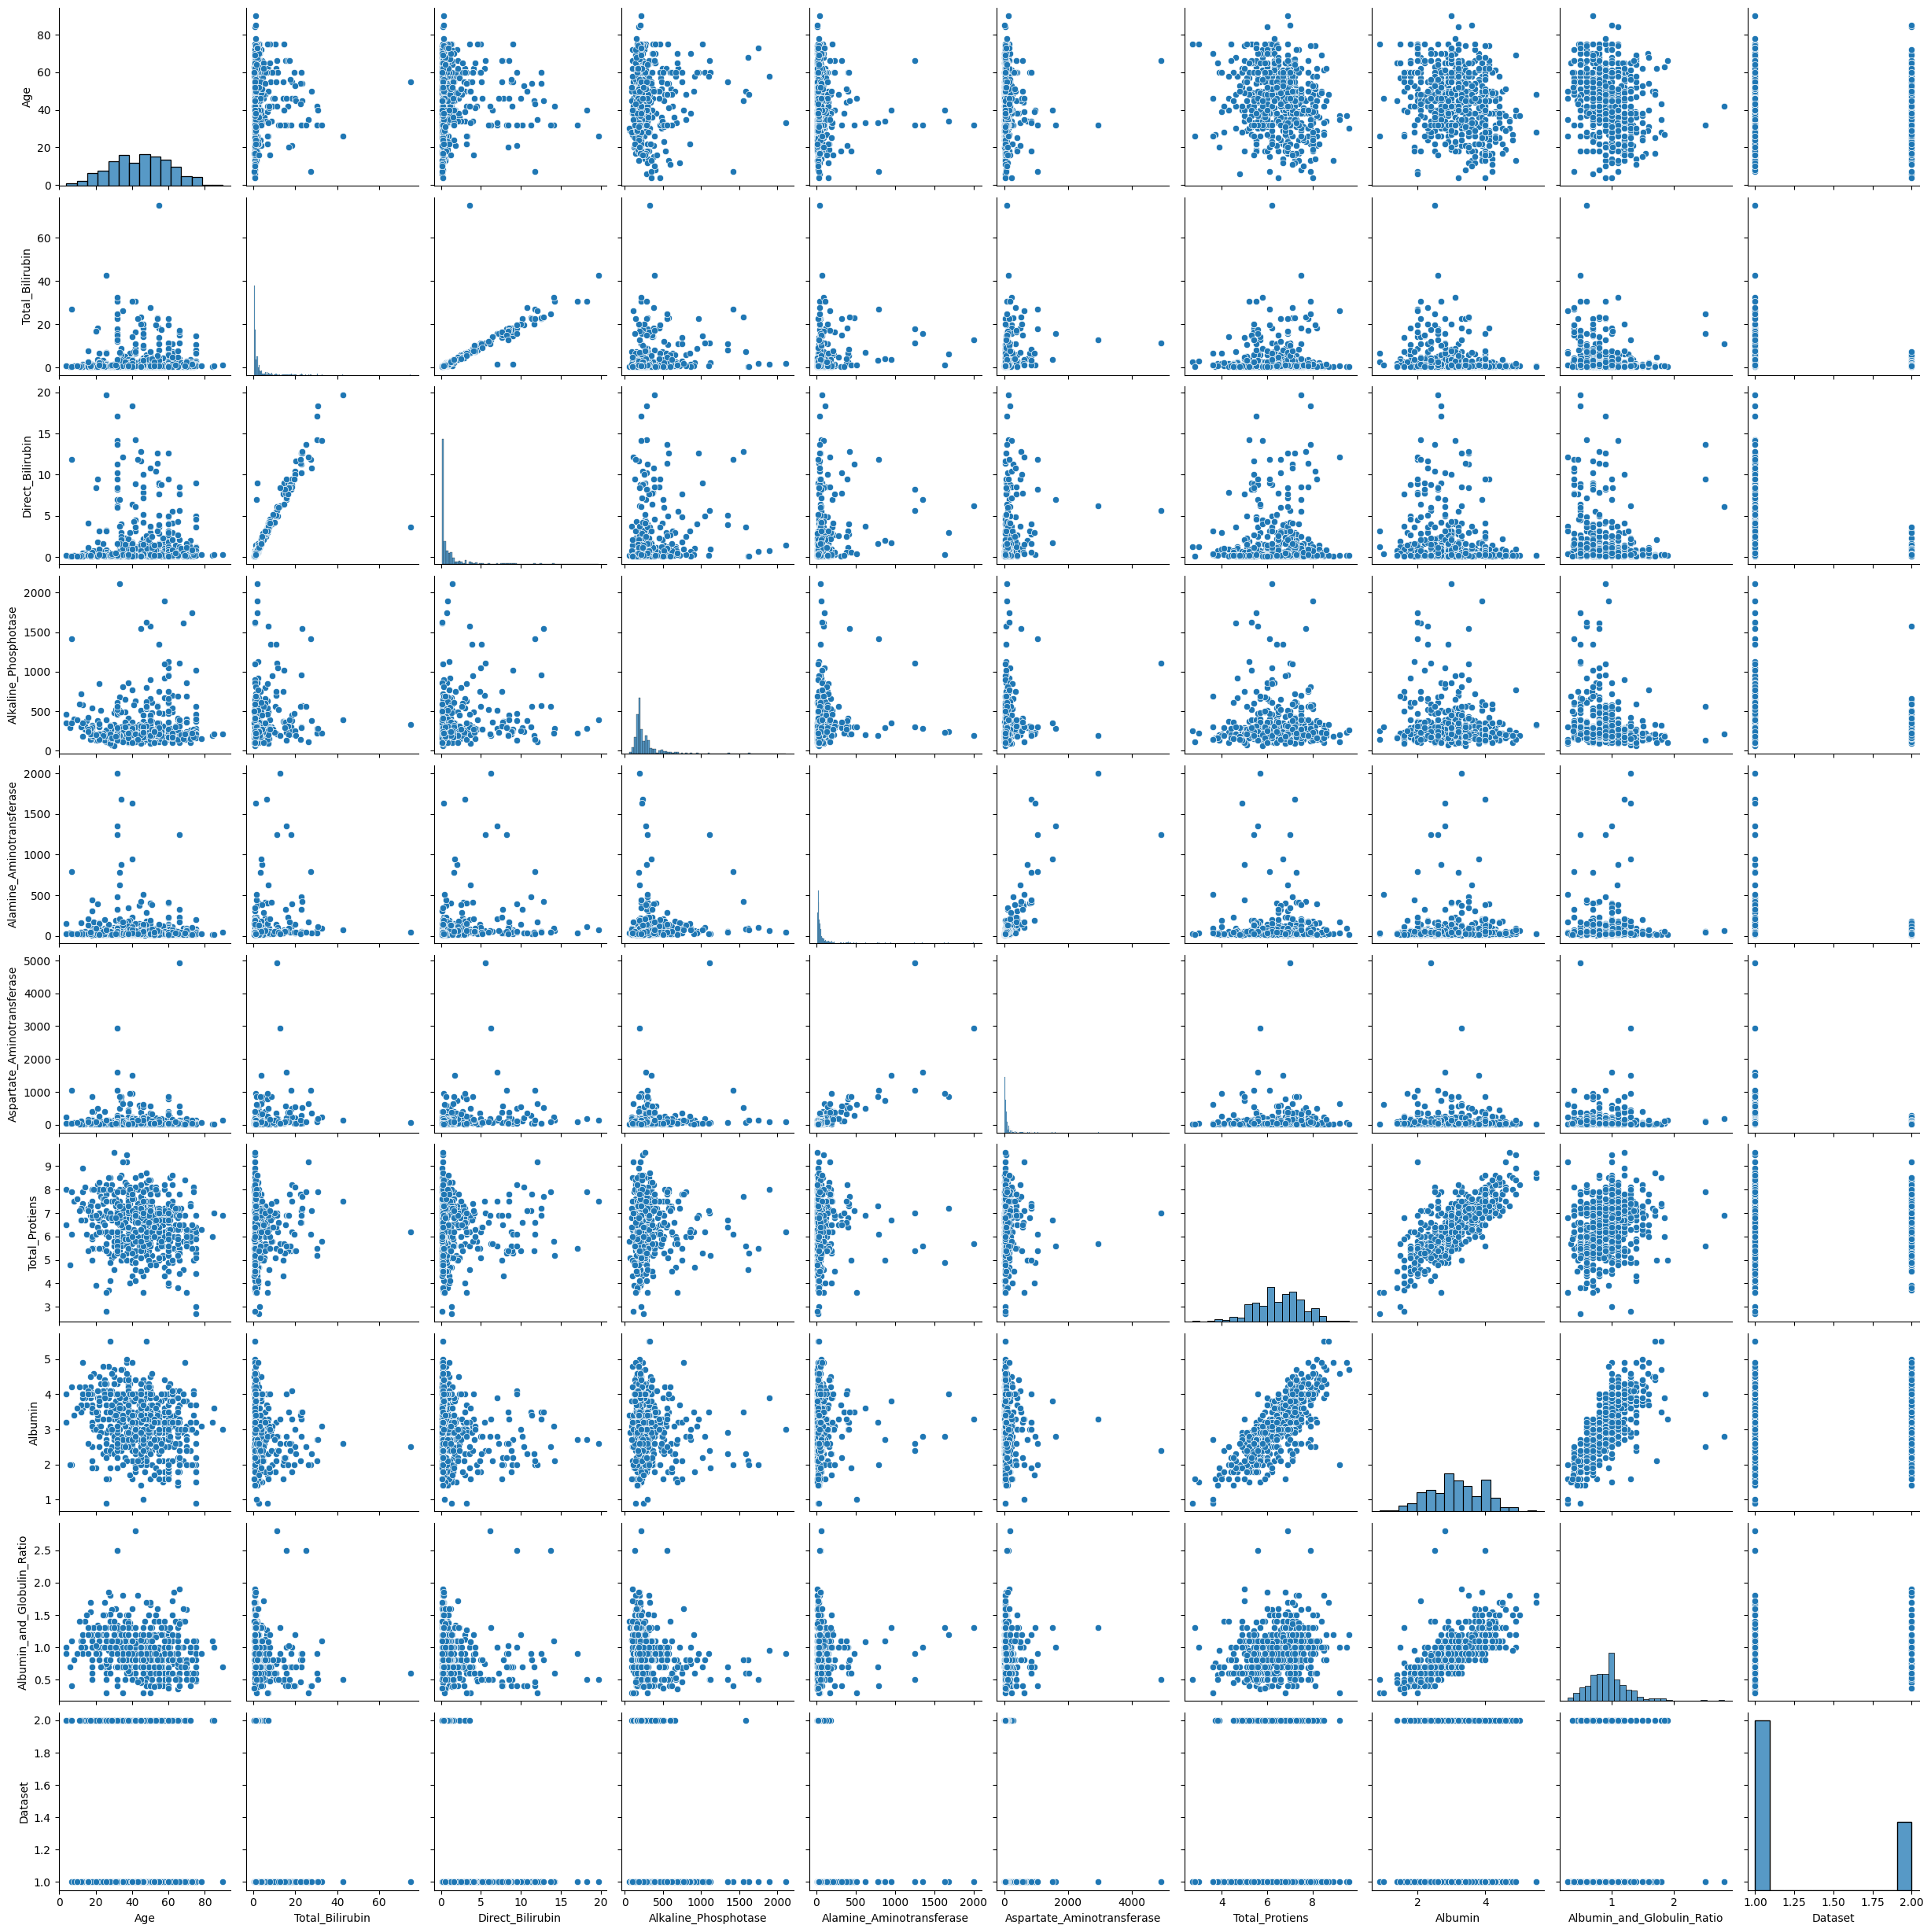

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
cleanup_nums = {"Gender":     {"Female": 0, "Male": 1}}
df.replace(cleanup_nums, inplace=True)

In [14]:
corr_matrix=df.corr()
corr_matrix['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.162349
Albumin                       0.161388
Total_Protiens                0.035008
Gender                       -0.082416
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64

In [15]:
df['Alamine_Aminotransferase'].value_counts()

25     25
20     23
22     18
28     17
21     17
       ..
86      1
82      1
950     1
790     1
131     1
Name: Alamine_Aminotransferase, Length: 152, dtype: int64

array([[<Axes: xlabel='Dataset', ylabel='Dataset'>,
        <Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Dataset'>,
        <Axes: xlabel='Total_Protiens', ylabel='Dataset'>,
        <Axes: xlabel='Age', ylabel='Dataset'>,
        <Axes: xlabel='Aspartate_Aminotransferase', ylabel='Dataset'>,
        <Axes: xlabel='Alamine_Aminotransferase', ylabel='Dataset'>,
        <Axes: xlabel='Alkaline_Phosphotase', ylabel='Dataset'>,
        <Axes: xlabel='Total_Bilirubin', ylabel='Dataset'>,
        <Axes: xlabel='Direct_Bilirubin', ylabel='Dataset'>],
       [<Axes: xlabel='Dataset', ylabel='Albumin_and_Globulin_Ratio'>,
        <Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Albumin_and_Globulin_Ratio'>,
        <Axes: xlabel='Total_Protiens', ylabel='Albumin_and_Globulin_Ratio'>,
        <Axes: xlabel='Age', ylabel='Albumin_and_Globulin_Ratio'>,
        <Axes: xlabel='Aspartate_Aminotransferase', ylabel='Albumin_and_Globulin_Ratio'>,
        <Axes: xlabel='Alamine_Aminotransferase

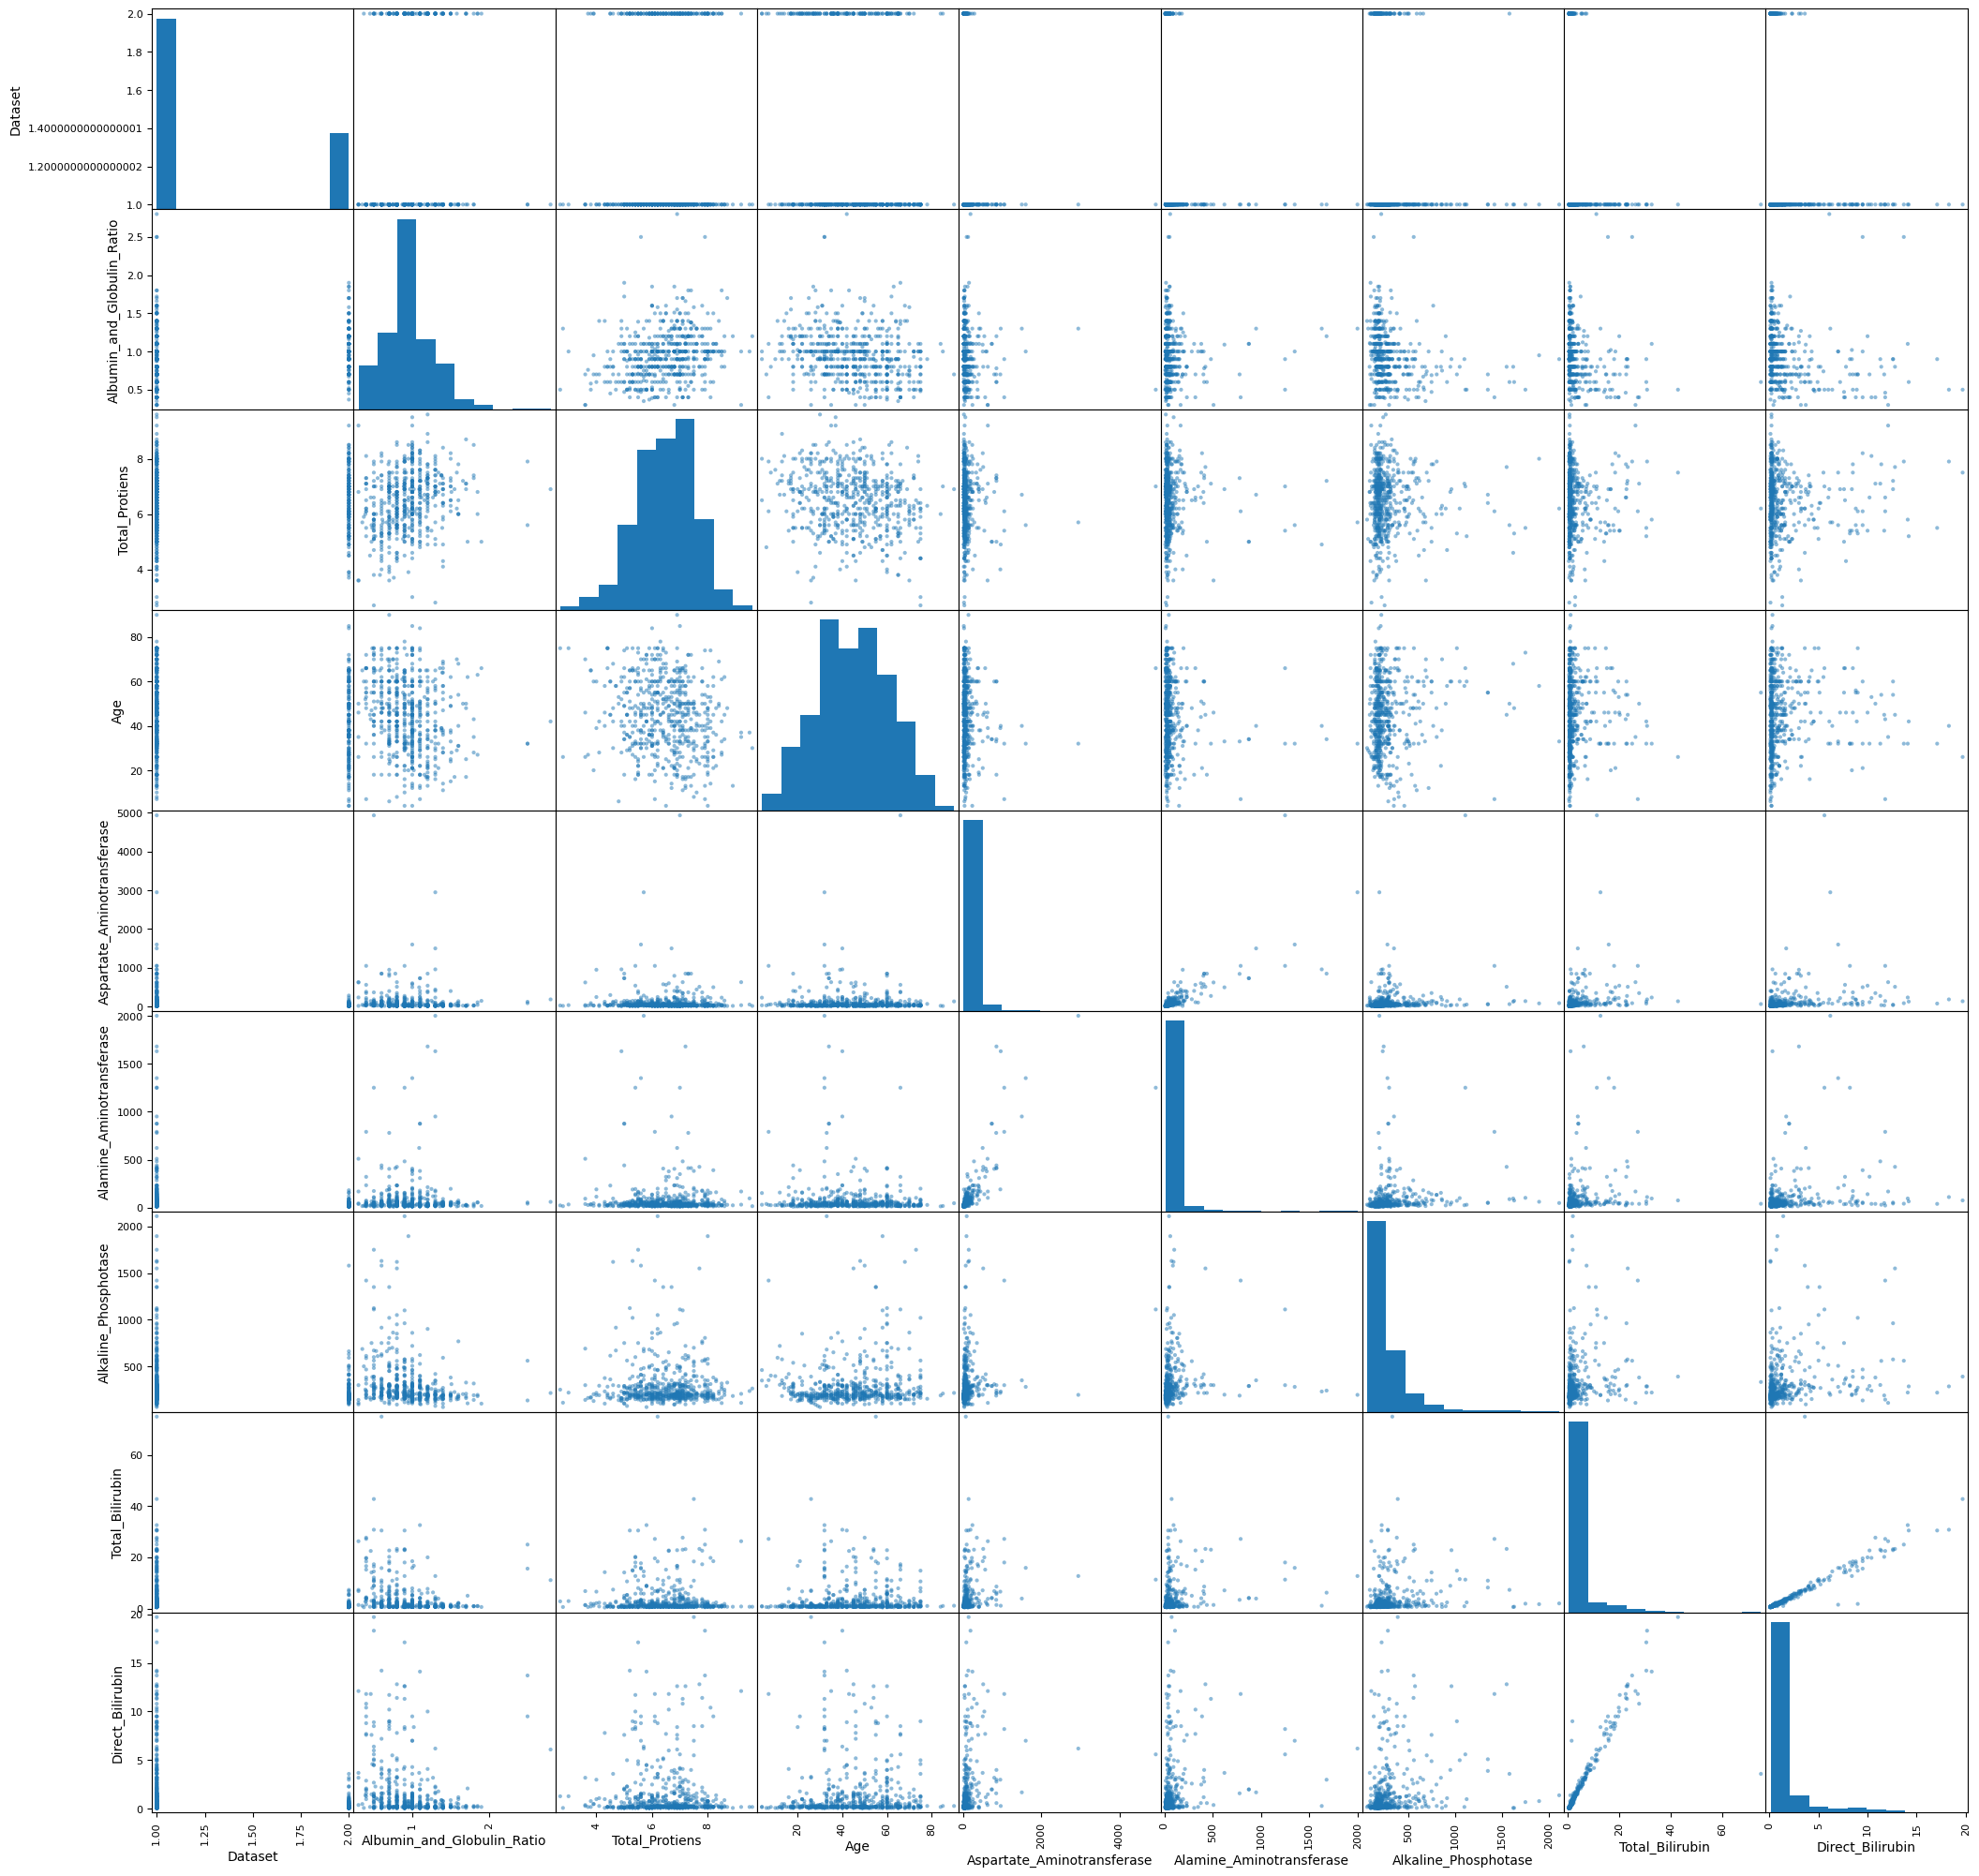

In [16]:
get_ipython().run_line_magic('matplotlib', 'inline')
from pandas.plotting import scatter_matrix
attributes=["Dataset","Albumin_and_Globulin_Ratio","Total_Protiens","Age","Aspartate_Aminotransferase","Alamine_Aminotransferase","Alkaline_Phosphotase","Total_Bilirubin","Direct_Bilirubin"]
scatter_matrix( df[attributes],figsize=(25,25))


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
train_set,test_set=train_test_split(df,test_size=0.3,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")


Rows in train set:408
Rows in test set:175



In [18]:
train_set_labels=train_set['Dataset'].copy()
train_set=train_set.drop('Dataset',axis=1).copy()
test_set_labels=test_set['Dataset'].copy()
test_set=test_set.drop('Dataset',axis=1).copy()


x = train_set.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_set = pd.DataFrame(x_scaled)

y = test_set.values
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
test_set = pd.DataFrame(y_scaled)

In [19]:
X_train = train_set.astype('float32')
X_test = test_set.astype('float32')
print("Input data shape",train_set.shape)

Input data shape (408, 10)


In [20]:
train_set_labels

519    1
536    1
531    1
380    1
550    1
      ..
71     1
106    2
270    1
435    2
102    1
Name: Dataset, Length: 408, dtype: int64

In [23]:
logreg = LogisticRegression()
logreg.fit(train_set, train_set_labels)
log_predicted= logreg.predict(test_set)
logreg_score = round(logreg.score(train_set, train_set_labels) * 100, 2)
logreg_score_test = round(logreg.score(test_set, test_set_labels) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(test_set_labels,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(test_set_labels,log_predicted))
print('Classification Report: \n', classification_report(test_set_labels,log_predicted))


Logistic Regression Training Score: 
 71.08
Logistic Regression Test Score: 
 71.43
Coefficient: 
 [[-0.52107305 -0.35687947 -1.01969297 -2.05629665 -1.32826446 -1.45707008
  -0.68680001 -0.54330635  1.17191571  0.71517315]]
Intercept: 
 [-0.50950979]
Accuracy: 
 0.7142857142857143
Confusion Matrix: 
 [[123   5]
 [ 45   2]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.96      0.83       128
           2       0.29      0.04      0.07        47

    accuracy                           0.71       175
   macro avg       0.51      0.50      0.45       175
weighted avg       0.61      0.71      0.63       175



<Axes: >

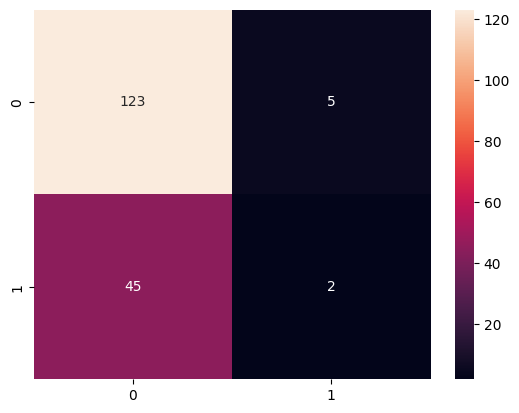

In [24]:
sns.heatmap(confusion_matrix(test_set_labels,log_predicted),annot=True,fmt="d")